# Import libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [51]:
dataset = pd.read_csv('master.csv')
X = dataset.drop(['suicides/100k pop', 'suicides_no'], axis=1) #delete some "duplicate" features
y = dataset['suicides/100k pop']
#dataset[' gdp_for_year ($) '] = dataset[' gdp_for_year ($) '].str.replace(',', '').astype(float)
# X = dataset.
# y = dataset.pop('suicides/100k pop')
# X = dataset.iloc[:, :].values
#X

# Preprocessing

In [52]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [53]:
#pd.get_dummies(X['country'], drop_first=True)

In [54]:
# X_num = X.select_dtypes(include=['int64', 'float64']).copy()
# X_cat = X.select_dtypes(include=['object']).copy()
# X_cat.pop('country-year'); #duplicate data
numeric_features = ['year','HDI for year', ' gdp_for_year ($) ', 'population',
                   'gdp_per_capita ($)']
categorical_features = ['country', 'sex', 'age', 'country-year', 'generation']

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler #these all appear to come because HDI wasn't available prior to 2
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# num_imputer = Imputer(missing_values='NaN', strategy='mean')
# num_imputer = num_imputer.fit(X_num)
# X_num = num_imputer.transform(X_num)
# imputer = Imputer(missing_values='NaN', strategy='mean')
# imputer = imputer.fit(X[:, 7:8])
# X[:, 7:8] = imputer.transform(X[:, 7:8])
numeric_transformer = Pipeline(steps=[
    ('imputer', Imputer(missing_values='NaN', strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder()) #switched for get_dummies to avoid dummy variable trap
        #ran into issues with this so decided to just use fit_intercept=false in any linear regression models
    #('get_dummies', pd.get_dummies(drop_first=True))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X = clf.fit_transform(X)



C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:

# onehotencoder = OneHotEncoder(categorical_features=[0, 2, 3, 6, 10])
# X = onehotencoder.fit_transform(X).toarray()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#need to avoid dummy variable trap

#y_test

In [58]:
X.shape

(27820, 2441)

In [59]:
#Need to drop some dummy variables to avoid colinearity if using linear regression

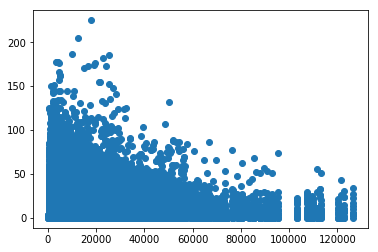

In [60]:
plt.scatter(dataset['gdp_per_capita ($)'], dataset['suicides/100k pop'])
#there appears to be an exponential relationship between gdp per capita and suicides.
#there are a few outliers but I think I'll leave them in. Also there appears to be some underrepresented GDPsaround 1000000

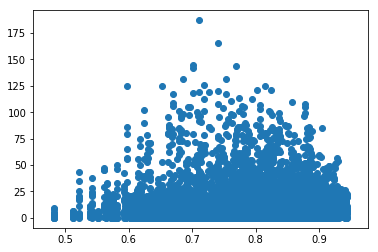

In [61]:
plt.scatter(dataset['HDI for year'], dataset['suicides/100k pop'])
#seems to reach a maximum around 0.77 HDI. Mildly normal distributed